In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = r"C:\Users\Abhilash\Desktop\Data Trained\Projects\Dataset\Advertising.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result    
    

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [4]:
data = pd.read_csv(path,encoding = 'ascii')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.shape

(200, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

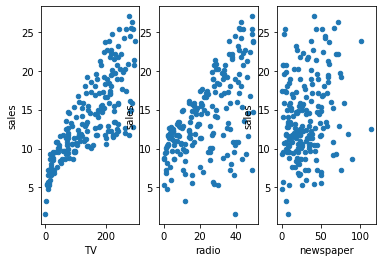

In [10]:
# visualize the  relationship between  the fetaures and the response using scatterplots
fig, axs=plt.subplots(1,3)  # fig we have used so that we can save it in the later cause

data.plot(kind='scatter', x='TV', y='sales', ax=axs[0]) # removed figsize as it was throwing error
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])
fig.savefig('testdata.jpg') #using fig here to save now

In [11]:
# SIMPLE LINEAR REGRESSION

#Create x=feature and y=label

x=data[['TV']]
y=data.sales

from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(x,y)

LinearRegression()

In [12]:
print(lm.intercept_)  #c==> intercept
print(lm.coef_)       #m==> COefficient

# Y=mx+c

7.032593549127693
[0.04753664]


In [13]:
#creating a DataFrame since the model expects it
x_new=pd.DataFrame({'TV':[50]})
x_new.head()

,TV
0,50


In [14]:
#Use the model to make predictions  on a new value
lm.predict(x_new)

array([9.40942557])

In [15]:
##PLOTTING THE LEAST SQUARES LINE

In [17]:
#Create a DataFrame with the minimum and maximum values of TV
x_new=pd.DataFrame({'TV': [data.TV.min(),data.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [18]:
#Making predictions for those x values and storing them
preds=lm.predict(x_new)
preds

array([ 7.0658692 , 21.12245377])

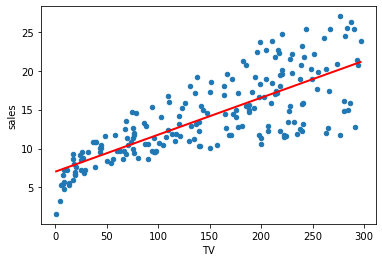

In [20]:
#First plot the observed area
data.plot(kind='scatter',x='TV',y='sales')
# then plot the least square line
plt.plot(x_new,preds,c='red',linewidth=2)

In [22]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV',data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [23]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [24]:
lm.rsquared

0.611875050850071

# Multiple Linear Regression

In [26]:
#Create x and y
x=data[['TV','radio','newspaper']]
y=data.sales

In [27]:
lm=LinearRegression()
lm.fit(x,y)

#print intercept and coefficients
print('Intercept : ->',lm.intercept_)
print('TV :        ->',lm.coef_[0] )
print('radio :     ->',lm.coef_[1])
print('newspaper  ->' ,lm.coef_[2])

Intercept : -> 2.9388893694594067
TV :        -> 0.04576464545539761
radio :     -> 0.18853001691820462
newspaper  -> -0.0010374930424762972


In [29]:
lm=smf.ols(formula='sales~ TV+radio+newspaper',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           1.58e-96
Time:                        14:42:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Only include TV and Radio in the model
lm=smf.ols(formula='sales~ TV+radio',data=data).fit()
lm.rsquared

0.8971942610828957

In [37]:
#add newspaper to the model (which we believe has no association with the sales)
lm=smf.ols(formula='sales~ TV+radio+newspaper',data=data).fit()
lm.rsquared

0.8972106381789522

ERROR! Session/line number was not unique in database. History logging moved to new session 169


In [38]:
import pickle
advertise = 'finalized_model.pickle'
pickle.dump(lm,open(advertise,'wb'))

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
loaded_model=pickle.load(open(advertise,'rb'))
a=loaded_model.predict(scaler.transform(x))
